<a href="https://colab.research.google.com/github/jwookkim0512/machinelearning-assignments/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-153594bf260a>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-2-153594bf260a>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-2-153594bf260a>:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] += -alpha * dJdW1_21
<ipython-input-2-153594bf260a>:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in

MSE and MAPE at epoch 0: 0.3174, 54.55%
MSE and MAPE at epoch 5: 0.2674, 51.60%
MSE and MAPE at epoch 10: 0.1895, 43.27%
MSE and MAPE at epoch 15: 0.0968, 30.50%
MSE and MAPE at epoch 20: 0.0336, 17.40%
MSE and MAPE at epoch 25: 0.0092, 8.47%
MSE and MAPE at epoch 30: 0.0027, 3.87%
MSE and MAPE at epoch 35: 0.0012, 2.00%
MSE and MAPE at epoch 40: 0.0009, 1.74%
MSE and MAPE at epoch 45: 0.0007, 1.76%
MSE and MAPE at epoch 49: 0.0007, 1.78%


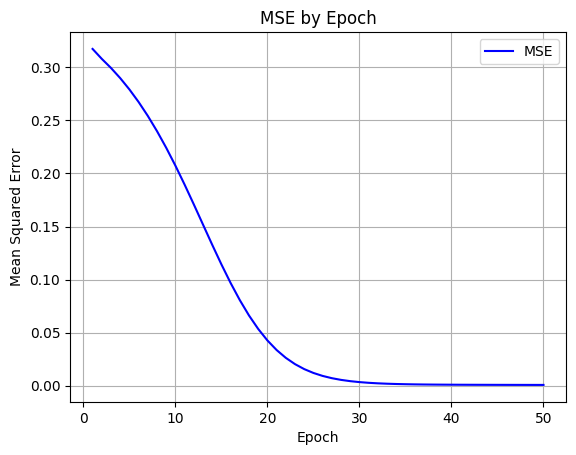

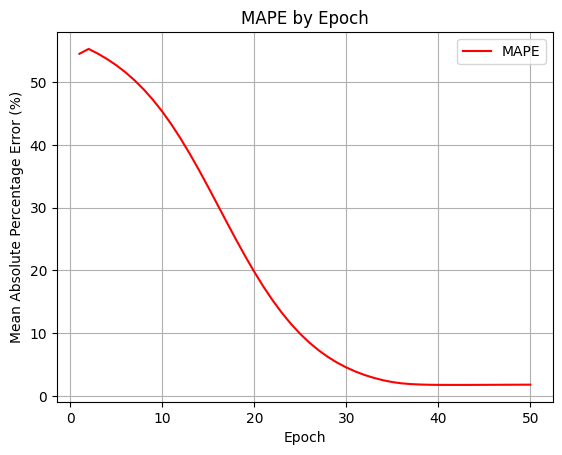

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
num_samples = 300

# 입력 특성 2개 (x1, x2)
feature1 = np.random.uniform(0, 1, num_samples)
feature2 = np.random.uniform(0, 1, num_samples)

Input = np.column_stack((feature1, feature2))

# 목표값: 선형 조합
y = 2.5 * feature1 + 1.5 * feature2

# 시그모이드 함수 및 도함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# 네트워크 구조
input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

# 가중치 및 바이어스 초기화
W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 1e-2  # 학습률 0.01로 변경
epochs = 50
MSE_list, MAPE_list = [], []

for epoch in range(epochs):
    MSE, MAPE = 0, 0
    for iter in range(num_samples):
        X = Input[iter]

        # 순전파
        Z_tilde = W1 @ X.reshape(-1,1) + b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2 @ Z.reshape(-1,1) + b2.reshape(-1,1)

        # 오차 계산
        J = 1/2 * (y_pred - y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred - y[iter]) / y[iter]) * 100

        # 역전파
        dJdY = y_pred - y[iter]
        dJdW2_11, dJdW2_12, dJdW2_13 = dJdY * Z[0], dJdY * Z[1], dJdY * Z[2]
        dJdb2_1 = dJdY
        dJdZ1, dJdZ2, dJdZ3 = dJdY * W2[0,0], dJdY * W2[0,1], dJdY * W2[0,2]

        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdZ3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])

        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])

        # 업데이트
        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32

        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        b1[2] += -alpha * dJdb1_3

        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        b2[0] += -alpha * dJdb2_1

    MSE /= num_samples
    MAPE /= num_samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))

    if epoch % 5 == 0 or epoch == epochs - 1:
        print(f'MSE and MAPE at epoch {epoch}: {np.squeeze(MSE):.4f}, {np.squeeze(MAPE):.2f}%')

# 시각화
plt.figure()
plt.plot(np.arange(1, epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1, epochs+1), MAPE_list, label='MAPE', linewidth=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()
